In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thuylinh110","key":"3bb3906d323a1b96a9c85c4ad60aa6da"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset
!pip install zip_files
!unzip /content/face-mask-12k-images-dataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: Face Mask Dataset/Train/WithoutMask/1869.png  
  inflating: Face Mask Dataset/Train/Withou

In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir='/content/Face Mask Dataset/Train'
test_dir='/content/Face Mask Dataset/Test'
valid_dir='/content/Face Mask Dataset/Validation'

In [5]:
train_data_generator = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 0.2,
                                   horizontal_flip= True)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [6]:
train_data = train_data_generator.flow_from_directory(train_dir,
                                               target_size=(128, 128),
                                               batch_size=50, class_mode='binary')
valid_data = test_data_generator.flow_from_directory(valid_dir,
                                             target_size= (128, 128),
                                             batch_size=50,class_mode='binary')

print(train_data.class_indices)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
{'WithMask': 0, 'WithoutMask': 1}


In [16]:
vgg =tf.keras.applications.vgg16.VGG16(weights='imagenet', input_shape=(128,128,3), include_top=False)


58900480/58889256 [==============================] - 1s 0us/step


In [17]:
model=tf.keras.models.Sequential()
model.add(vgg)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               153900    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)              

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')

In [19]:

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10,
                                              restore_best_weights=False, verbose=1)

In [20]:
history = model.fit(train_data,steps_per_epoch=len(train_data)//32,
                    epochs=20,validation_data=valid_data, callbacks=[callback])

Epoch 1/20
6/6 [==============================] - 296s 53s/step - loss: 1.7147 - accuracy: 0.5133 - val_loss: 0.6954 - val_accuracy: 0.4963
Epoch 2/20
6/6 [==============================] - 294s 53s/step - loss: 0.7019 - accuracy: 0.5133 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 3/20
5/6 [========================>.....] - ETA: 30s - loss: 0.6995 - accuracy: 0.4880

KeyboardInterrupt: ignored

In [12]:
test_data = test_data_generator.flow_from_directory(test_dir,
                                             target_size= (128, 128),
                                             batch_size=50,class_mode='binary')
model.evaluate(test_data)

Found 992 images belonging to 2 classes.
20/20 [==============================] - 41s 2s/step - loss: 1.2770 - accuracy: 0.8962


[1.27700674533844, 0.8961693644523621]

(1, 150, 150, 3)
[[0.]]


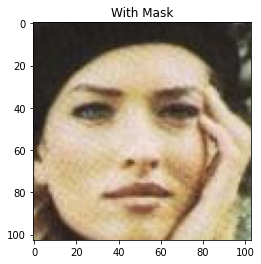

In [15]:
pred_img = '/content/Face Mask Dataset/Test/WithoutMask/1148.png'
image1 = tf.keras.preprocessing.image.load_img(path=pred_img,
                                             target_size=(128,128))

input_arr = tf.keras.preprocessing.image.img_to_array(image1)
input_arr = np.array([input_arr])
print(input_arr.shape)
predictions=model.predict(input_arr)
print(predictions)
if predictions > 0:
    plt.title('Without Mask')
else:
    plt.title("With Mask")
plt.imshow(plt.imread(pred_img))